# Convolutional Neural Network for multi-class classification





## Imports

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
import torch.nn as nn

## Load Data

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import Subset

new_transform=transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

dataset_root = "./Caltech_101/101_ObjectCategories"
dataset_full = datasets.ImageFolder(root=dataset_root, transform=new_transform)

class_to_indices = {class_idx: [] for class_idx in range(len(dataset_full.classes))}
for idx, (_, class_idx) in enumerate(dataset_full.samples):
    class_to_indices[class_idx].append(idx)

# Select 15 images per class for training and testing
train_indices = []
test_indices = []
for class_idx, indices in class_to_indices.items():
    if len(indices) < 30:
        raise ValueError(f"Not enough images for class {class_idx}. Found {len(indices)}, need 30.")
    train_indices.extend(indices[:15])
    test_indices.extend(indices[15:30])

# Create subsets
dataset_train = Subset(dataset_full, train_indices)
dataset_test = Subset(dataset_full, test_indices)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=15, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=15, shuffle=False)


In [27]:
print()
print("Image Shape: {}".format(dataset_train[0][0].shape))
print()
print("Training Set:   {} samples".format(len(dataset_train)))
print("Test Set:       {} samples".format(len(dataset_test)))


Image Shape: torch.Size([3, 32, 32])

Training Set:   150 samples
Test Set:       150 samples


Label of the image is:4


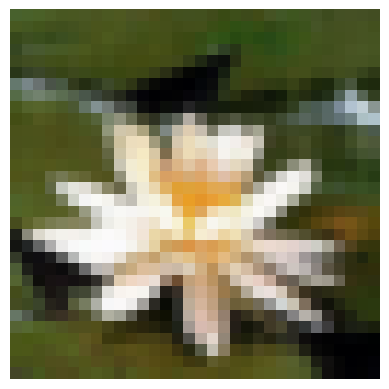

In [28]:
import pdb
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))  # Convert from Tensor (C, H, W) to NumPy (H, W, C)
    mean = np.array([0.5, 0.5, 0.5])  # Mean used in Normalize
    std = np.array([0.5, 0.5, 0.5])  # Std used in Normalize
    img = std * img + mean  # Denormalize
    img = np.clip(img, 0, 1)  # Clip values to valid range
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.axis('off')

index = random.randint(0, len(dataset_train))
image = dataset_train[index][0].squeeze()

imshow(image)
print("Label of the image is:%d"%dataset_train[index][1])

In [29]:
# Pytorch modification From https://www.kaggle.com/usingtc/lenet-with-pytorch

from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        self.conv1 = nn.Conv2d(3, 12, 5)
        # Layer 2: Convolutional. Output = 10x10x24.
        self.conv2 = nn.Conv2d(12, 24, 5)
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        self.fc1   = nn.Linear(24 * 5 * 5, 120)
        # Layer 4: Fully Connected. Input = 120. Output = 84.
        self.fc2   = nn.Linear(120, 84)
        # Layer 5: Fully Connected. Input = 84. Output = 10.
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x):
        # Activation. # Pooling. Input = 28x28x12. Output = 14x14x12.
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
         # Activation. # Pooling. Input = 10x10x24. Output = 5x5x24.
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        # Flatten. Input = 5x5x16. Output = 400.
        x = x.flatten(start_dim=1)
        # Activation.
        x = F.relu(self.fc1(x))
        # Activation.
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [52]:
net = LeNet()
print (net)

loss_function = nn.CrossEntropyLoss()
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(net.parameters(), lr=learning_rate)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

LeNet(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [53]:
for epoch in range (600):
    print(f"Training epoch {epoch}...")
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print(f"Loss : {running_loss / len(train_loader)}")


Training epoch 0...
Loss : 2.3052716970443727
Training epoch 1...
Loss : 2.305139946937561
Training epoch 2...
Loss : 2.3050094127655028
Training epoch 3...
Loss : 2.304880428314209
Training epoch 4...
Loss : 2.304781436920166
Training epoch 5...
Loss : 2.304658055305481
Training epoch 6...
Loss : 2.3045474529266357
Training epoch 7...
Loss : 2.304433083534241
Training epoch 8...
Loss : 2.3043013334274294
Training epoch 9...
Loss : 2.304209566116333
Training epoch 10...
Loss : 2.304083013534546
Training epoch 11...
Loss : 2.3039600372314455
Training epoch 12...
Loss : 2.3038525104522707
Training epoch 13...
Loss : 2.303732490539551
Training epoch 14...
Loss : 2.3036288738250734
Training epoch 15...
Loss : 2.30350022315979
Training epoch 16...
Loss : 2.303393006324768
Training epoch 17...
Loss : 2.3032822132110597
Training epoch 18...
Loss : 2.3031689643859865
Training epoch 19...
Loss : 2.3030478954315186
Training epoch 20...
Loss : 2.3029324769973756
Training epoch 21...
Loss : 2.3028

In [54]:
   
torch.save(net.state_dict(), ('trained_net.pth'))

In [55]:
net = LeNet()
net.load_state_dict(torch.load('trained_net.pth'))

correct = 0
total = 0

net.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy : {accuracy}%")

C:\Users\felix\AppData\Local\Temp\ipykernel_18468\786473148.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('trained_net.pth'))


Accuracy : 50.0%


#Functions for visualisations



In [ ]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    img_shape = (32, 32)

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [25]:
#Direct access to dataset object is absolutely not recommended in bigger dataset.
y_test = []
for i, (images, labels) in enumerate(test_loader):
    y_test.append(labels)

X_test = []
for i, (images, labels) in enumerate(test_loader):
    X_test.append(images)
X_test = torch.cat(X_test)

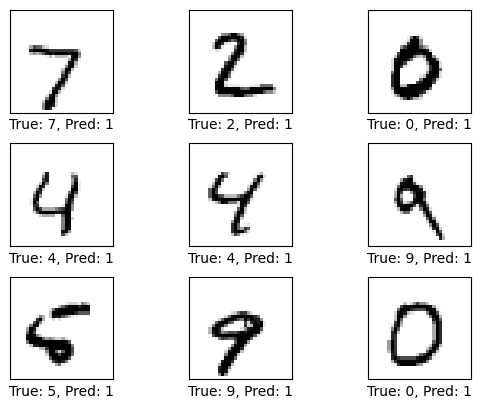

In [27]:

def plot_example_errors(y_pred, y_true):
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct_prediction = np.equal(y_pred, y_true)

    # Negate the boolean array.
    incorrect = np.equal(correct_prediction, False).bool()

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]

    # Get the predicted classes for those images.
    cls_pred = y_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9].astype(int))

plot_example_errors(test_predictions, torch.cat(y_test))